In [1]:
ENV["Code"] = "../../Code"
[push!(LOAD_PATH, string(ENV["Code"],"/", ii)) for ii in readdir(ENV["Code"])]

using DataFrames,CSV,Seaborn,Statistics
using NoLongerProblems, PrettyPlotting, NoLongerProblems_Pandas
using PyCall, RCall
import Pandas 

include(ENV["Code"]*"/../Code_Paper/Databases/Cuartero2018.jl")
include(ENV["Code"]*"/../Code_Paper/Databases/Bhatt2012.jl"))
using StatsBase
using PyCall

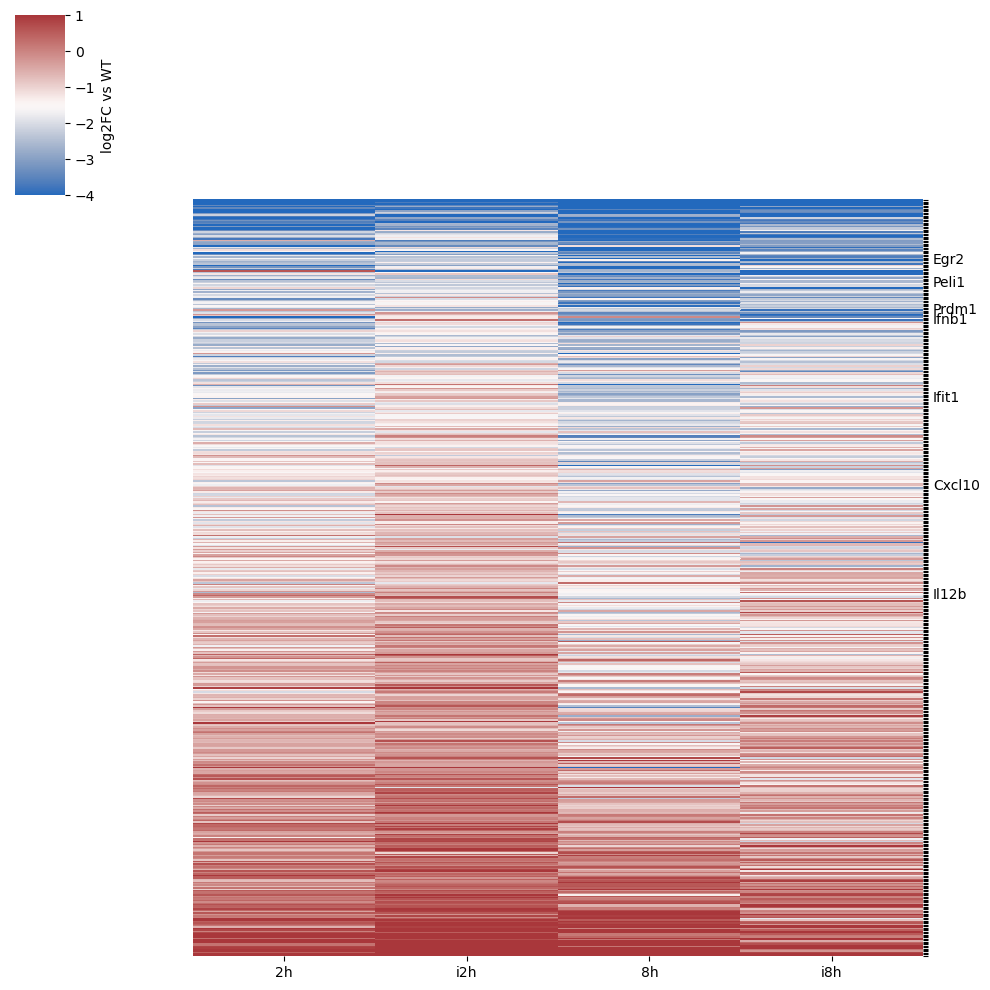

In [2]:
function add_log2FC(gc, deseq, foldname)
    sub = deepcopy(deseq[:, [:GeneSymbol, :log2FoldChange]])
    #sub[!,:log2FoldChange] = 2.^sub[!,:log2FoldChange]
    rename!(sub, :log2FoldChange => foldname)
    gc = innerjoin(gc, sub, on = :GeneSymbol)
end


#de0 = dropmissing!(Cuartero2018.Cuartero2018Deseq("FLUT_Minus_WTUT"))
de2 = dropmissing!(Cuartero2018.Cuartero2018Deseq("FL2_Minus_WT2"))
de8 = dropmissing!(Cuartero2018.Cuartero2018Deseq("FL8_Minus_WT8"))
dei2 = dropmissing!(Cuartero2018.Cuartero2018Deseq("FLi2_Minus_WTi2"))
dei8 = dropmissing!(Cuartero2018.Cuartero2018Deseq("FLi8_Minus_WTi8"))

symbolscommon = intersect(
    intersect(
        intersect(
            de2[:, :GeneSymbol],de2[:, :GeneSymbol])
        ,de2[:, :GeneSymbol]),
    de2[:, :GeneSymbol])

bhatt = Bhatt2012.inducible_genes_figure3()[:, [:Class, :GeneSymbol]]
genestoconsider = bhatt

# Make table
## add fold changes

genestoconsider = add_log2FC(genestoconsider, de2, "2h")
genestoconsider = add_log2FC(genestoconsider, dei2, "i2h")
genestoconsider = add_log2FC(genestoconsider, de8, "8h")
genestoconsider = add_log2FC(genestoconsider, dei8, "i8h")

# Delete duplicate rows
mapco = countmap(genestoconsider[!, :GeneSymbol])
list = []
for ii in keys(mapco)
    if mapco[ii]>1 push!(list, ii)
    end
end
bool  = [!in(ii, list) for ii in genestoconsider[!, :GeneSymbol]]
genestoconsider = genestoconsider[bool, :]
genestoconsider[!,:sumi] = sum.(eachrow(genestoconsider[!, 3:end]))
sort!(genestoconsider, [ "sumi"])
genes =  genestoconsider[!, :GeneSymbol]
genestoconsider = genestoconsider[!, 3:6];


# Make clustermap
genestohighlight = ["Egr2", "Il12b", "Ifnb1", "Peli1", "Prdm1", "Ifit1", "Cxcl10"]
genes = [if !in(ii, genestohighlight) "" else ii end for ii in genes]
pd = Pandas.DataFrame(genestoconsider)

py"""
import pandas as pd
import seaborn as sns

df = $pd
#df.set_index('GeneSymbol', inplace=True)
h = sns.clustermap(df, 
cmap = "vlag", 
vmin = -4, 
vmax =1, 
yticklabels = $genes, row_cluster = False, col_cluster = False, cbar_kws = {"label":"log2FC vs WT"})
"""

savefigwithtext("ClustermapRad21KOvsWTlog2FCIFNGrescue.svg")

In [4]:
import Pkg; Pkg.status()

      Status `~/.julia/environments/v1.6/Project.toml`
  [336ed68f] CSV v0.9.11
  [8f4d0f93] Conda v1.5.2
  [a93c6f00] DataFrames v1.2.2
  [31c24e10] Distributions v0.25.28
  [09f84164] HypothesisTests v0.10.6
  [7073ff75] IJulia v1.23.2
  [916415d5] Images v0.24.1
  [f8716d33] MultipleTesting v0.5.0
  [d330b81b] PyPlot v2.10.0
  [6f49c342] RCall v0.13.12
  [d2ef9438] Seaborn v1.0.0
  [2913bbd2] StatsBase v0.33.13
